# Multilinear Regression to predict Boston House price

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.regressionplots import influence_plot
import statsmodels.formula.api as smf
import numpy as np

In [2]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
#boston

# EDA

In [3]:
data = np.hstack([boston.values[::2, :], boston.values[1::2, :3]])
#target = boston.values[1::2, 2]
#data
#Convert array into DataFrame and rename columns
boston_data = pd.DataFrame(data, columns =['crime', 'land_zone', 'indus', 'C_River', 'nox','avg_rooms', 'age','dist','r_highway', 'tax', 'pt_ratio','blacks','lstat','price_median_value'])
#boston_data = pd.DataFrame(target, columns =['price_Median_value'])
#boston_data.shape


In [ ]:
#Dropping Duplicates
boston_data.duplicated().sum()
#boston_data.drop_duplicates()
#boston_data.shape

In [ ]:
#Check Missing Values
boston_data.info()

In [ ]:
#Check Null Values
boston_data.isna().sum()
boston_data.isnull().sum()
#boston_data.notna().sum()
#boston_data.notnull().sum()
#boston_data.dropna()

In [ ]:
#finding Data types of Columns
boston_data.info()
#boston_data.dtypes

# Check Collineariry/Dependability of Variabels

# Coorelation Matrix

In [8]:
boston_data.corr()  #colinearity check

,crime,land_zone,indus,C_River,nox,avg_rooms,age,dist,r_highway,tax,pt_ratio,blacks,lstat,price_median_value
crime,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
land_zone,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
C_River,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
avg_rooms,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dist,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
r_highway,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


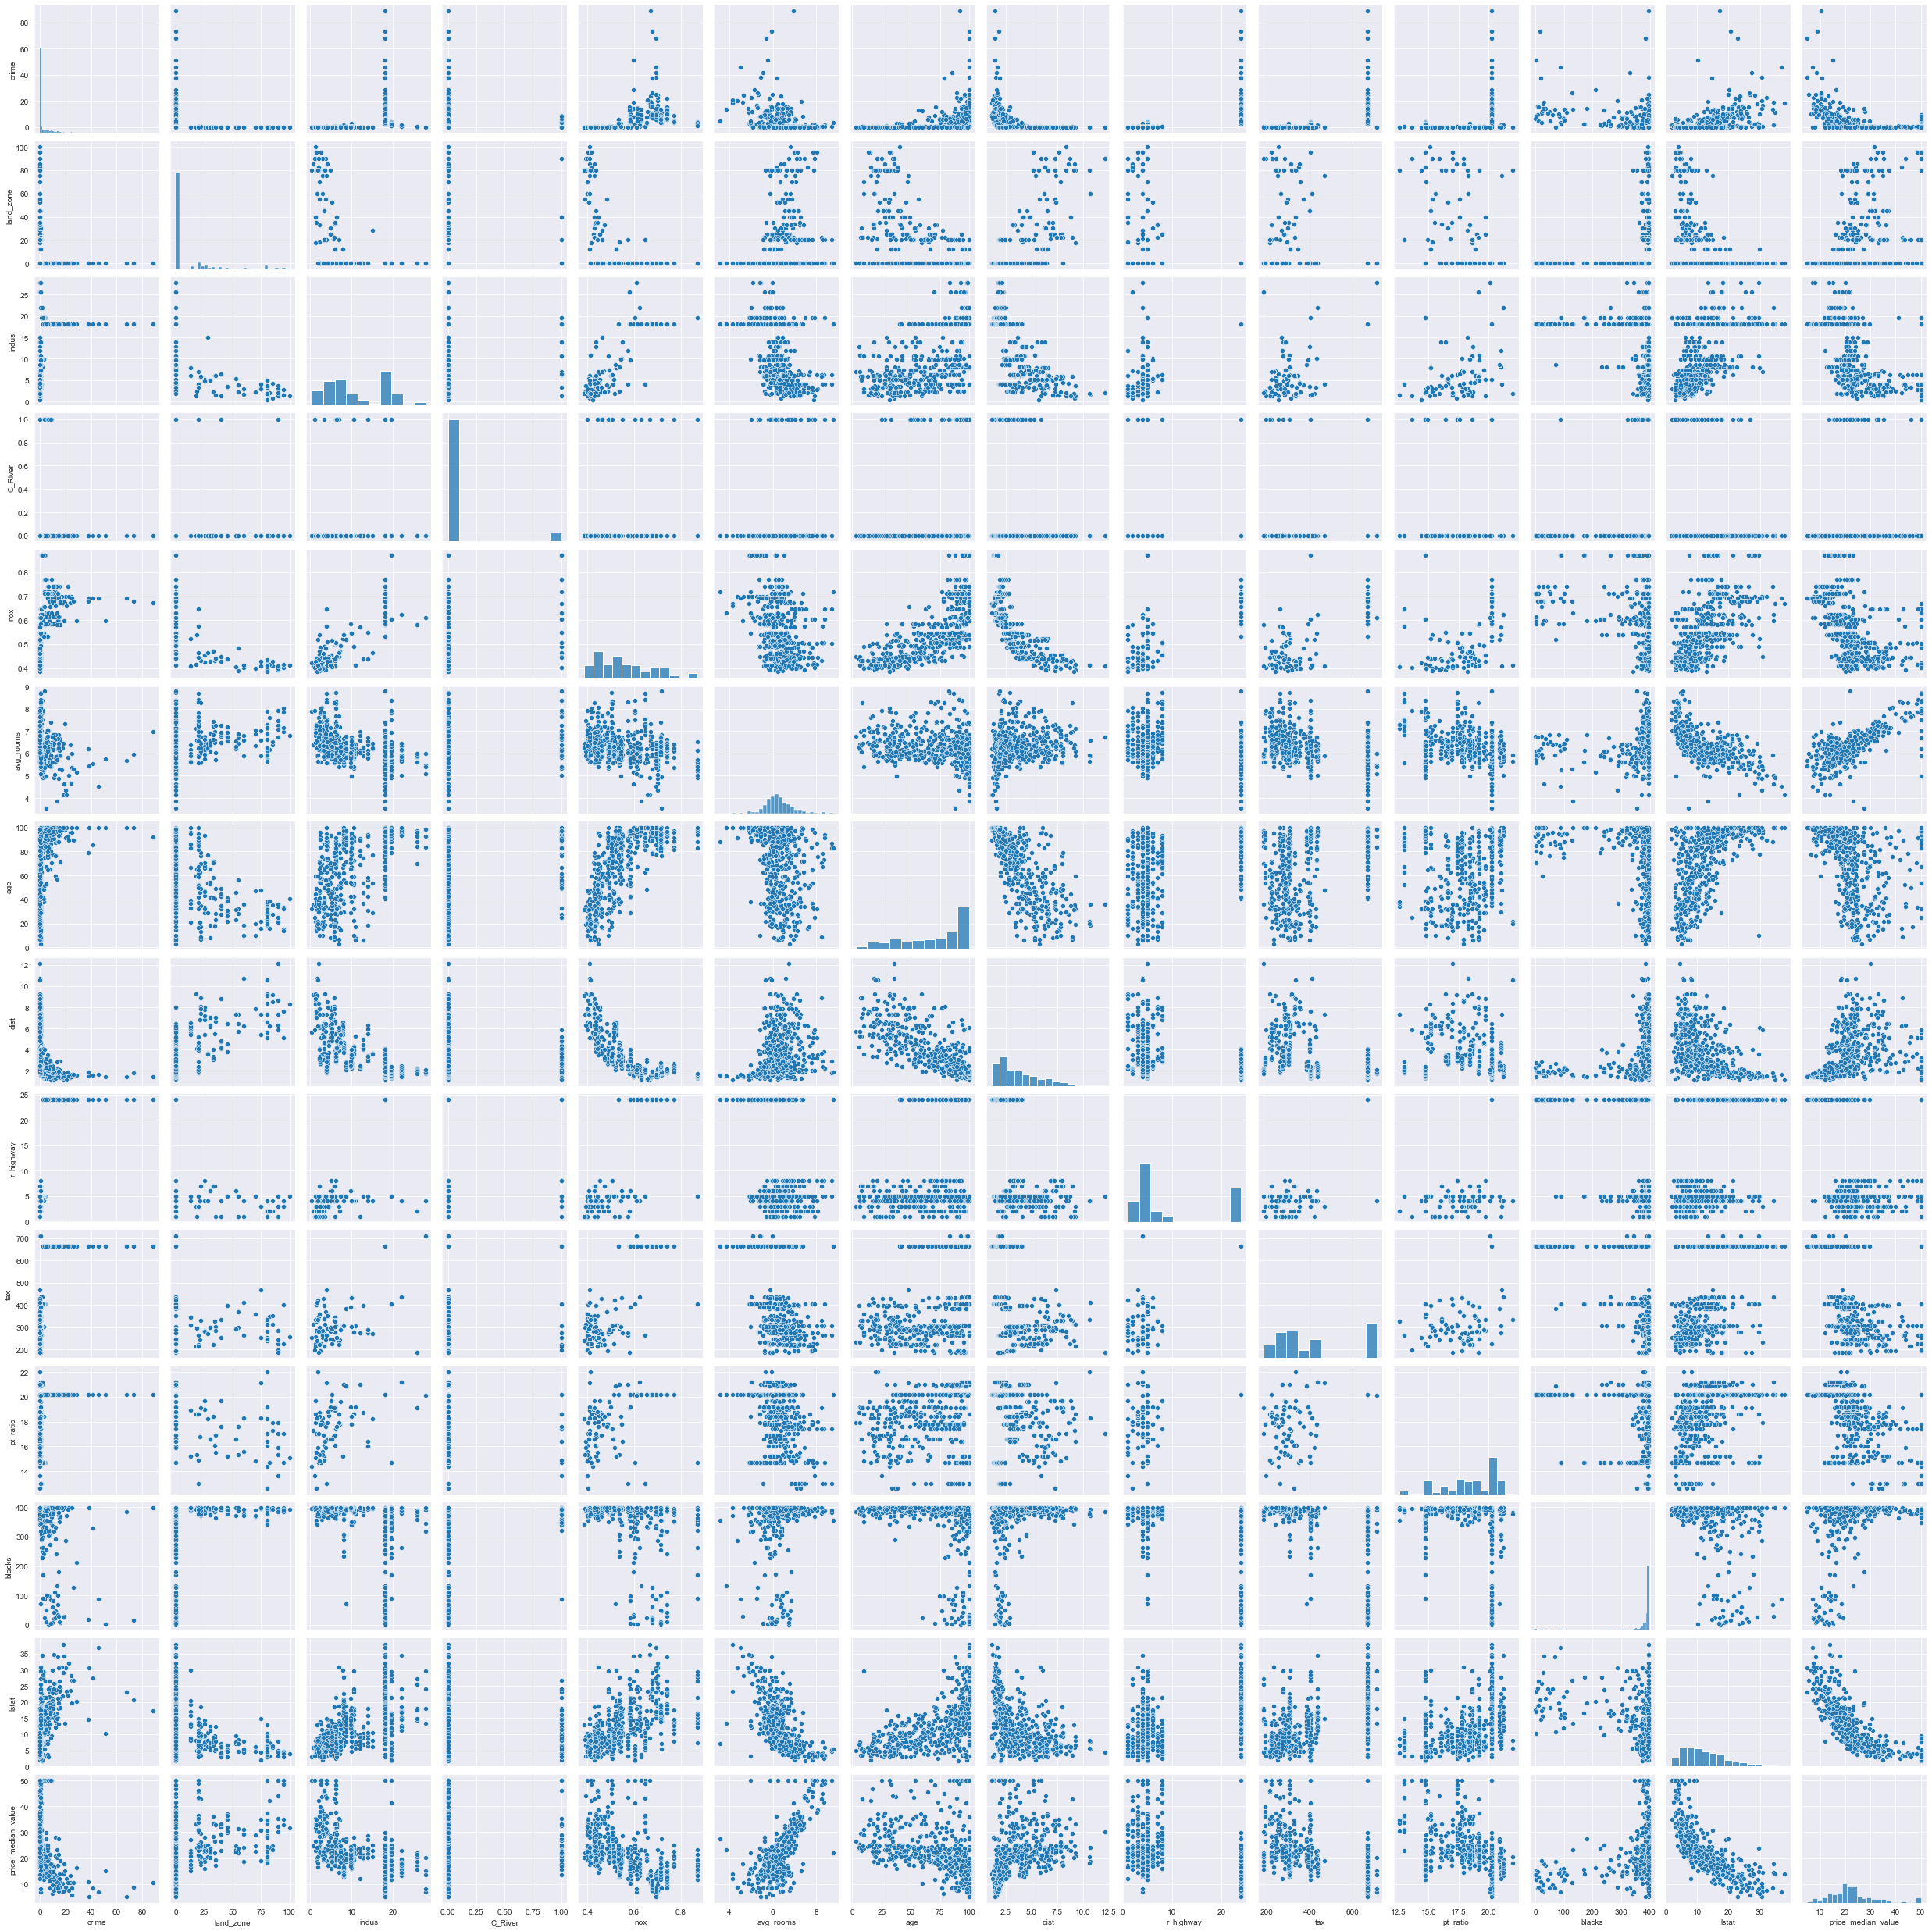

In [9]:
#Format the plot background and scatter plots for all the variables
sns.set_style(style='darkgrid') 
sns.pairplot(boston_data) #colinearity check

# Prepare Model

In [4]:
model=smf.ols("price_median_value~crime+land_zone+indus+C_River+nox+avg_rooms+age+dist+r_highway+tax+pt_ratio+blacks+lstat",data=boston_data).fit()
model.summary()  #colinearity check byc checking R2 and P values

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     price_median_value   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Fri, 11 Mar 2022   Prob (F-statistic):          6.72e-135
Time:                        20:05:52   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     36.4595      5.103      7.144      0.000      26.432      46.487
crime         -0.1080      0.033     -3.287      0.001      -0.173      -0.043
land_zone      0.0464      0.014      3.382      0.001       0.019       0.073
indus          0.0206      0.061      0.334      0.738      -0.100       0.141
C_River        2.6867      0.862      3.118      0.002       0.994       4.380
nox          -17.7666      3.820     -4.651      0.000     -25.272     -10.262
avg_rooms      3.8099      0.418      9.116      0.000       2.989       4.631
age            0.0007      0.013      0.052      0.958      -0.025       0.027
dist          -1.4756      0.199     -7.398      0.000      -1.867      -1.084
r_highway      0.3060      0.066      4.613      0.000       0.176       0.436
tax           -0.0123      0.004     -3.280      0.001      -0.020      -0.005
pt_ratio      -0.9527      0.131     -7.283      0.000      -1.210      -0.696
blacks         0.0093      0.003      3.467      0.001       0.004       0.015
lstat         -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [5]:
#R squared values
(model.rsquared,model.rsquared_adj)

(0.7406426641094094, 0.7337897263724629)

In [ ]:
#Apply simple regression as correlation of r_highwy and tax is 0.9


In [13]:
model_r_highway=smf.ols("r_highway~tax",data=boston_data).fit()
model_r_highway.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              r_highway   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     2435.
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          4.13e-195
Time:                        00:26:04   Log-Likelihood:                -1366.4
No. Observations:                 506   AIC:                             2737.
Df Residuals:                     504   BIC:                             2745.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -9.6483      0.421    -22.927      0.000     -10.475      -8.821
tax            0.0470      0.001     49.346      0.000       0.045       0.049
==============================================================================
Omnibus:                      238.355   Durbin-Watson:                   0.364
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1444.720
Skew:                          -1.994   Prob(JB):                         0.00
Kurtosis:                      10.254   Cond. No.                     1.16e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.16e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
#here r2>0.85 and pvalues<0.05, so combine
model_r_highway_tax=smf.ols("price_median_value~r_highway+tax",data=boston_data).fit()
model_r_highway_tax.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     price_median_value   R-squared:                       0.231
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     75.66
Date:                Thu, 10 Mar 2022   Prob (F-statistic):           1.88e-29
Time:                        00:26:30   Log-Likelihood:                -1773.7
No. Observations:                 506   AIC:                             3553.
Df Residuals:                     503   BIC:                             3566.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     35.6359      1.347     26.465      0.000      32.990      38.281
r_highway      0.2762      0.100      2.770      0.006       0.080       0.472
tax           -0.0386      0.005     -7.485      0.000      -0.049      -0.028
==============================================================================
Omnibus:                      170.143   Durbin-Watson:                   0.648
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              486.175
Skew:                           1.637   Prob(JB):                    2.68e-106
Kurtosis:                       6.513   Cond. No.                     1.66e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.66e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# above r2 and p values indicates that r_highway or tax is influencing result

In [ ]:
#Calculate VIF (Variance Influence factor) #colinearity check

In [6]:
rsq_crime = smf.ols('crime~land_zone+indus+C_River+nox+avg_rooms+age+dist+r_highway+tax+pt_ratio+blacks+lstat',data=boston_data).fit().rsquared  
vif_crime = 1/(1-rsq_crime) 
rsq_land_zone = smf.ols('land_zone~crime+indus+C_River+nox+avg_rooms+age+dist+r_highway+tax+pt_ratio+blacks+lstat',data=boston_data).fit().rsquared  
vif_land_zone = 1/(1-rsq_land_zone) 

rsq_indus = smf.ols('indus~crime+land_zone+C_River+nox+avg_rooms+age+dist+r_highway+tax+pt_ratio+blacks+lstat',data=boston_data).fit().rsquared  
vif_indus = 1/(1-rsq_indus)
rsq_C_River = smf.ols('C_River~crime+land_zone+indus+nox+avg_rooms+age+dist+r_highway+tax+pt_ratio+blacks+lstat',data=boston_data).fit().rsquared  
vif_C_River = 1/(1-rsq_C_River)
rsq_nox = smf.ols('nox~crime+land_zone+indus+C_River+avg_rooms+age+dist+r_highway+tax+pt_ratio+blacks+lstat',data=boston_data).fit().rsquared  
vif_nox = 1/(1-rsq_nox)
rsq_avg_rooms = smf.ols('avg_rooms~crime+land_zone+indus+C_River+nox+age+dist+r_highway+tax+pt_ratio+blacks+lstat',data=boston_data).fit().rsquared  
vif_avg_rooms = 1/(1-rsq_avg_rooms)
rsq_age = smf.ols('age~crime+land_zone+indus+C_River+nox+avg_rooms+dist+r_highway+tax+pt_ratio+blacks+lstat',data=boston_data).fit().rsquared  
vif_age = 1/(1-rsq_age)
rsq_dist = smf.ols('dist~crime+land_zone+indus+C_River+nox+avg_rooms+age+r_highway+tax+pt_ratio+blacks+lstat',data=boston_data).fit().rsquared  
vif_dist = 1/(1-rsq_dist)
rsq_r_highway = smf.ols('r_highway~crime+land_zone+indus+C_River+nox+avg_rooms+age+dist+tax+pt_ratio+blacks+lstat',data=boston_data).fit().rsquared  
vif_r_highway = 1/(1-rsq_r_highway)
rsq_tax = smf.ols('tax~crime+land_zone+indus+C_River+nox+avg_rooms+age+dist+r_highway+pt_ratio+blacks+lstat',data=boston_data).fit().rsquared  
vif_tax = 1/(1-rsq_tax)
rsq_pt_ratio = smf.ols('pt_ratio~crime+land_zone+indus+C_River+nox+avg_rooms+age+dist+r_highway+tax+blacks+lstat',data=boston_data).fit().rsquared  
vif_pt_ratio = 1/(1-rsq_pt_ratio)
rsq_blacks = smf.ols('blacks~crime+land_zone+indus+C_River+nox+avg_rooms+age+dist+r_highway+tax+pt_ratio+lstat',data=boston_data).fit().rsquared  
vif_blacks = 1/(1-rsq_blacks)
rsq_lstat = smf.ols('lstat~crime+land_zone+indus+C_River+nox+avg_rooms+age+dist+r_highway+tax+pt_ratio+blacks',data=boston_data).fit().rsquared  
vif_lstat = 1/(1-rsq_lstat)


# Storing vif values in a data frame
d1 = {'Variables':['crime','land_zone','indus','C_River','nox','avg_rooms','age','dist','r_highway','tax','pt_ratio','blacks','lstat'],'VIF':[vif_crime,vif_land_zone,vif_indus,vif_C_River,vif_nox,vif_avg_rooms,vif_age,vif_dist,vif_r_highway,vif_tax,vif_pt_ratio,vif_blacks,vif_lstat]}
Vif_frame = pd.DataFrame(d1)  
Vif_frame
#COMPARE VIFwith 10 or 20.
#if VIF>10 or VIF>20 thenvariable is having colinearity

,Variables,VIF
0,crime,1.792192
1,land_zone,2.298758
2,indus,3.991596
3,C_River,1.073995
4,nox,4.393720
5,avg_rooms,1.933744
6,age,3.100826
7,dist,3.955945
8,r_highway,7.484496
9,tax,9.008554


In [ ]:
#here all are <10 so no colinearity but highest value is tax=9.0 so it is more influencible variable so it can be removed

# Error / Residual Analysis = A.V.-P.V.=resid

# Residual Analysis
##Test for Normality of Residuals (Q-Q Plot)

C:\Users\pc\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


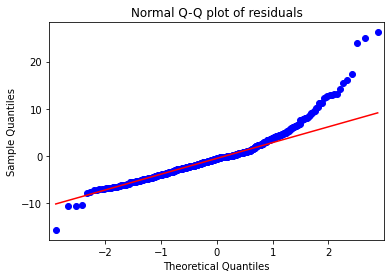

In [7]:
import statsmodels.api as sm
qqplot=sm.qqplot(model.resid,line='q') 
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [ ]:
# mean is not 0 as some points are out. if all points are on regression line then mean=0

In [8]:
Residue_arr_up=list(np.where(model.resid>20))
Residue_arr_up

[array([368, 371, 372], dtype=int64)]

In [9]:
Residue_arr_low=list(np.where(model.resid<-15))
Residue_arr_low

[array([364], dtype=int64)]

In [ ]:
#Residual plot for checking linear relation and constant variance

In [10]:
def get_standardized_values( vals ):
    return (vals - vals.mean())/vals.std()   #x-mu/s.d

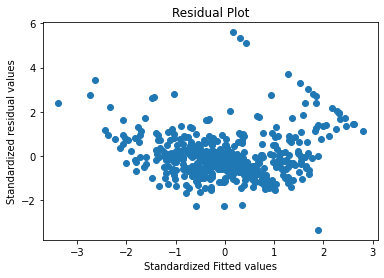

In [11]:
plt.scatter(get_standardized_values(model.fittedvalues),
            get_standardized_values(model.resid))

plt.title('Residual Plot')
plt.xlabel('Standardized Fitted values')
plt.ylabel('Standardized residual values')
plt.show()

# Residual Vs Regressors

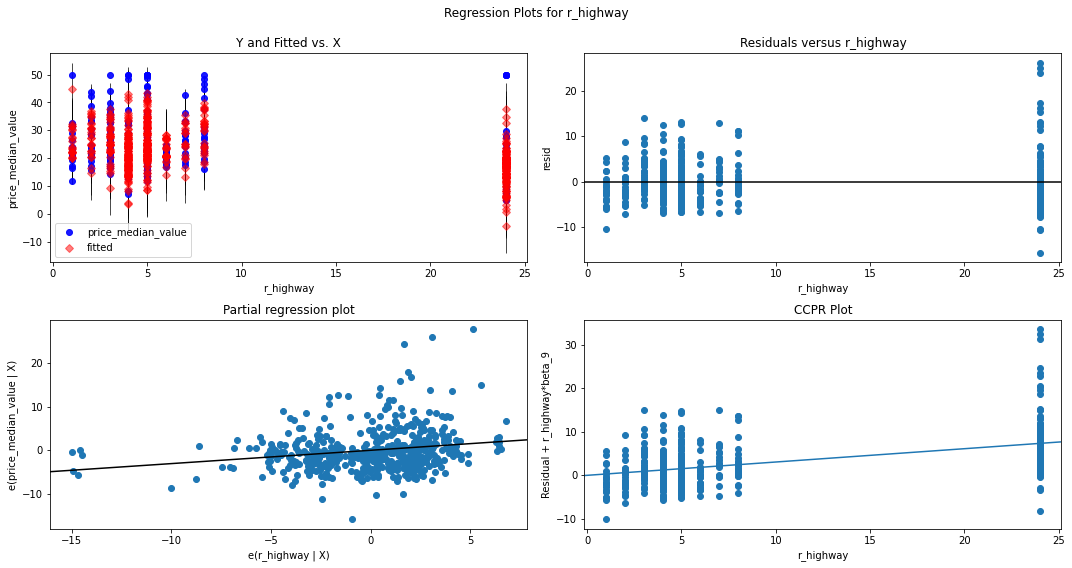

In [12]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "r_highway", fig=fig)
plt.show()

In [ ]:
# by observing 1st fig. error is available and last two plots should have slope

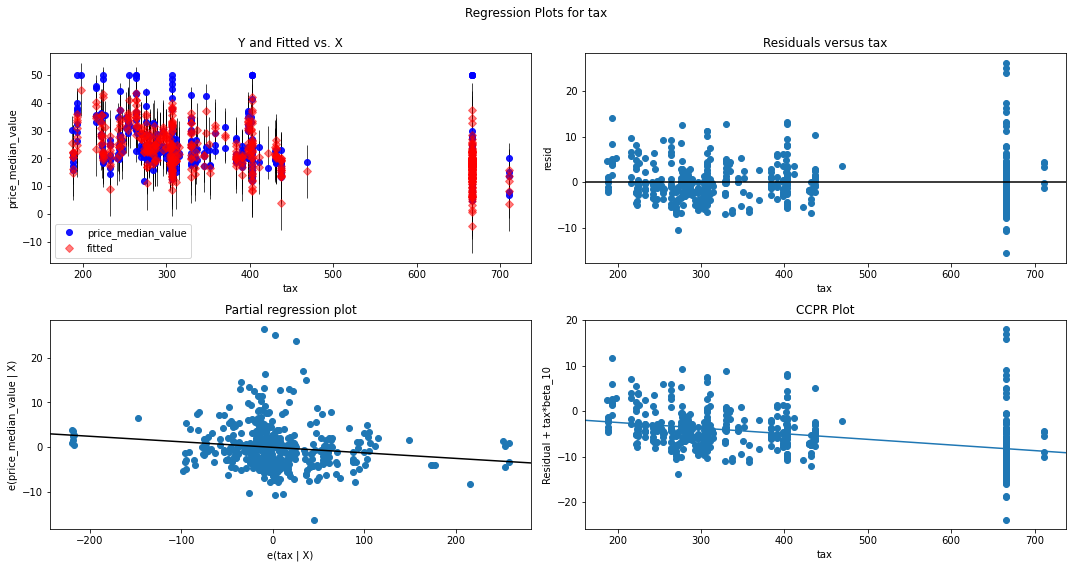

In [13]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "tax", fig=fig)
plt.show()

# Model Deletion Diagnostics

# Cook’s Distance for influencer/outlier detection

In [15]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

In [16]:
np.arange(len(boston_data))

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

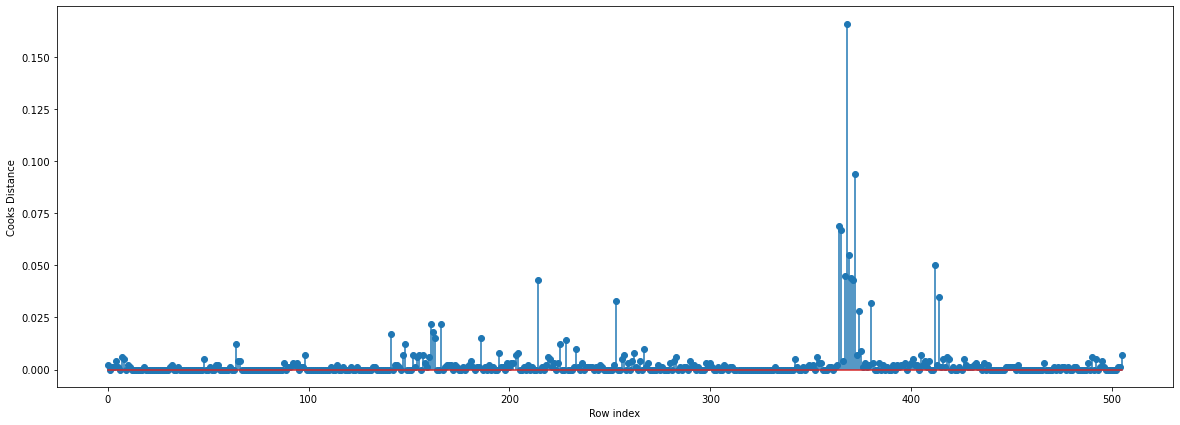

In [17]:
#Plot the influencers values using stem plot
fig = plt.subplots(figsize=(20, 7))
plt.stem(np.arange(len(boston_data)), np.round(c, 3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [111]:
#index and value of influencer where c is more than .5
(np.argmax(c),np.max(c))

(368, 0.16567368969818946)

# High Influence points

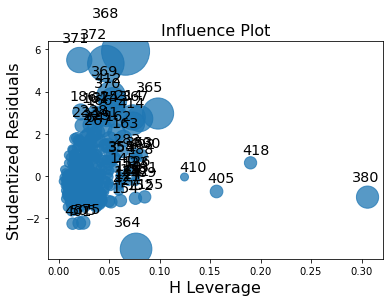

In [14]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model)
plt.rc("figure", figsize=(150,120))
influence_plot(model)
#import statsmodels.api as sm
#sm.graphics.influence_plot(model)
plt.show()

In [18]:
k = boston_data.shape[1]
n = boston_data.shape[0]
leverage_cutoff = 3*((k + 1)/n)
leverage_cutoff

0.08893280632411067

# Improving the model

In [113]:
#Discard the data points which are influencers and reasign the row number (reset_index())
boston_data_new=boston_data.drop(boston_data.index[[np.argmax(c)]],axis=0).reset_index()
boston_data_new.drop(['index'],axis=1)
boston_data_new.shape,boston_data.shape

((505, 15), (506, 14))

# Build New Model

In [114]:
model_C_River=smf.ols("price_median_value~crime+land_zone+indus+nox+avg_rooms+age+dist+r_highway+tax+pt_ratio+blacks+lstat",data=boston_data_new).fit()
model_C_River.summary()
model_C_River.rsquared,model.aic

(0.7477809106011319, 3025.608594075548)

In [73]:
#Exclude variable "nox and c_river" and generate R-Squared and AIC values

In [115]:
model_tax=smf.ols("price_median_value~crime+land_zone+indus+C_River+nox+avg_rooms+age+dist+pt_ratio+blacks+lstat",data=boston_data_new).fit()
model_tax.summary()
model_tax.rsquared,model.aic

(0.744117614247008, 3025.608594075548)

In [ ]:
# Comparing above R-Square and AIC values, model 'model_C_River' has high R- square and  AIC value is same
#hence exclude variable 'C_River' so that multi collinearity problem would be resolved.

In [116]:
#iterate untill r2 valule is greater than 0.85

boston_data_old=boston_data_new

while (model_C_River.rsquared<0.85):
    #Recheck infulence
    model_influence = model_C_River.get_influence()
    (c, _) = model_influence.cooks_distance
    #From the above plot, it is evident that data folloing points are the influencers [366]
    boston_data_old[boston_data_old.index.isin([np.argmax(c)])]
    #Drop observations
    boston_data_new=boston_data_old.drop(boston_data_old.index[[np.argmax(c)]],axis=0)
    boston_data_new.drop(['index'],axis=1)
    #boston_data_new4.shape,boston_data_new5.shape
    model_C_River=smf.ols("price_median_value~crime+land_zone+indus+nox+avg_rooms+age+dist+r_highway+tax+pt_ratio+blacks+lstat",data=boston_data_new).fit()
    #model_C_River.rsquared,model.aic
    boston_data_old=boston_data_new
model_C_River.summary()    

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     price_median_value   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     221.9
Date:                Thu, 10 Mar 2022   Prob (F-statistic):          3.26e-184
Time:                        01:49:28   Log-Likelihood:                -1248.4
No. Observations:                 480   AIC:                             2523.
Df Residuals:                     467   BIC:                             2577.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      4.4527      4.069      1.094      0.274      -3.543      12.448
crime         -0.1721      0.046     -3.745      0.000      -0.262      -0.082
land_zone      0.0271      0.010      2.774      0.006       0.008       0.046
indus         -0.0241      0.044     -0.546      0.585      -0.111       0.063
nox           -5.6406      2.746     -2.054      0.041     -11.037      -0.244
avg_rooms      6.8080      0.359     18.973      0.000       6.103       7.513
age           -0.0471      0.010     -4.747      0.000      -0.067      -0.028
dist          -1.0549      0.143     -7.389      0.000      -1.335      -0.774
r_highway      0.1942      0.050      3.903      0.000       0.096       0.292
tax           -0.0135      0.003     -5.156      0.000      -0.019      -0.008
pt_ratio      -0.7292      0.093     -7.857      0.000      -0.912      -0.547
blacks         0.0136      0.002      6.799      0.000       0.010       0.018
lstat         -0.1763      0.044     -4.014      0.000      -0.263      -0.090
==============================================================================
Omnibus:                       14.425   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.868
Skew:                           0.359   Prob(JB):                     0.000358
Kurtosis:                       3.528   Cond. No.                     1.63e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.63e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

# Predicting new data

In [117]:
data_pred=pd.DataFrame(data=np.array([[0.25651,0.0,9.69,0.0,0.538,6.5750,65.2,4.09000,5.0,296.0,19.05,391.44,11.36]]),columns=['crime','land_zone','indus','C_River','nox','avg_rooms','age','dist','r_highway','tax','pt_ratio','blacks','lstat'])
#data_pred
print("Predicted Data is ",model_C_River.predict(data_pred))

Predicted Data is  0    24.929167
dtype: float64


In [ ]:
#Predict using database

In [118]:
pred_y = model_C_River.predict(boston_data_new)
pred_y

0      28.794341
1      24.323623
2      31.208695
3      29.703048
4      29.925077
         ...    
500    24.766402
501    21.563790
502    27.448868
503    25.852872
504    20.739875
Length: 480, dtype: float64

In [111]:
boston_data_new2

,index,crime,land_zone,indus,C_River,nox,avg_rooms,age,dist,r_highway,tax,pt_ratio,blacks,lstat,price_median_value
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
476,501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67,22.4
477,502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08,20.6
478,503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64,23.9
479,504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48,22.0
